# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [13]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

.wav представляет собой две области - область заголовка и область данных. Как раз в заголовке файла мы можем найти информацию о размере файла, количестве каналов, частоте дискретизации, числе бит в семпле и т. д. В блоке данных по сути же последовательно хранится набор амплитуд в случае моноканальной записи, и чередующийся набор амплитуд  в случае двухканальной записи.

In [14]:
import struct

проведём парсинг заголовка .wav файла:

In [15]:
filename = 'voice.wav'

with open(filename, 'rb') as wav_file:

    chunk_id = wav_file.read(4) #RIFF структура, все значения данных формата хранятся как Little-Endian
    assert chunk_id == b'RIFF'
    
    chunk_size = struct.unpack('<I', wav_file.read(4))[0] #размер оставшейся цепочки
    
    wav_format = wav_file.read(4) #формат файла == WAVE
    assert wav_format == b'WAVE'
    
    sub_chunk_1_id = wav_file.read(4) #начало подцепочки
    assert sub_chunk_1_id == b'fmt '
    
    sub_chunk_1_size = struct.unpack('<I', wav_file.read(4))[0] #оставшийся размер подцепочки
    
    audio_format = struct.unpack('<H', wav_file.read(2))[0] #1 соответствует PCM формату
    assert audio_format == 1
    
    num_channels = struct.unpack('<H', wav_file.read(2))[0] #информация о числе каналов 1- моно, 2- стерео
    
    sample_rate = struct.unpack('<I', wav_file.read(4))[0] #частота дискрктизации
    
    byte_rate = struct.unpack('<I', wav_file.read(4))[0] #количество байт за секунду воспроизведения
    
    block_align = struct.unpack('<H', wav_file.read(2))[0] #количество байт для одного семпла по всем каналам
    
    bits_per_sample = struct.unpack('<H', wav_file.read(2))[0] #количество бит в сэмпле, т. е. параметр квантования    

т. е. у данной записи частота дискретизации:

In [16]:
sample_rate

44100

число уровней квантования:

In [17]:
bits_per_sample

16

### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

In [18]:
from scipy.io import wavfile
from IPython.display import Audio
import scipy.signal as sps

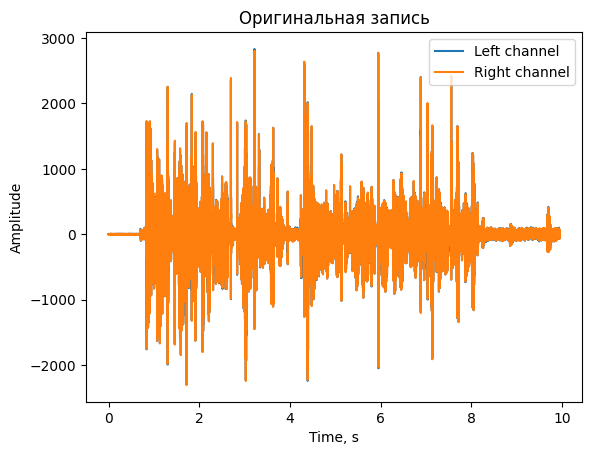

In [122]:
f_name = 'voice.wav'
sample_rate, data = wavfile.read(f_name)
length = data.shape[0] / sample_rate
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:, 0], label="Left channel")
plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.title('Оригинальная запись')
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.show()

In [123]:
Audio(data.T, rate=sample_rate)

In [118]:
new_rate = 1400
new_number_of_samples = round(data.shape[0] * float(new_rate) / sample_rate)
new_data = sps.resample(data, new_number_of_samples)

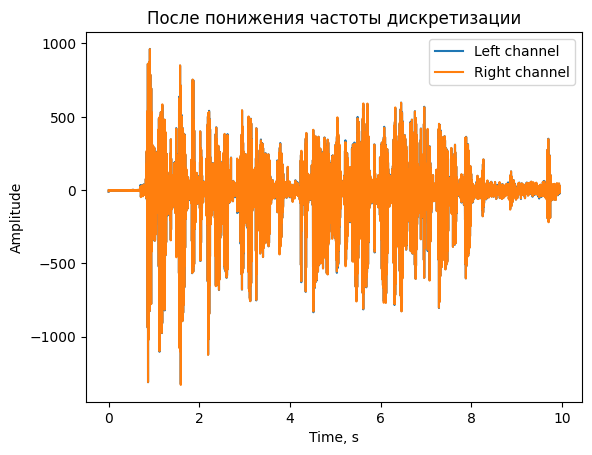

In [119]:
length = new_data.shape[0] / new_rate
time = np.linspace(0., length, new_data.shape[0])
plt.plot(time, new_data[:, 0], label="Left channel")
plt.plot(time, new_data[:, 1], label="Right channel")
plt.legend()
plt.title('После понижения частоты дискретизации')
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.show()

In [120]:
Audio(new_data.T, rate=3000)

При частоте дискретизации меньше 1400 становится трудно разобрать речь.

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

В отличие от .wav в .mp3 и .ogg используется сжатие двнных. Например, в записи формата .wav byteRate около 1400 Кбит/с, а в .mp3 макимальный показатель byteRate 320 Кбит/с. То есть звук формата .wav макисмально приближен к реальному звучанию.

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [125]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [126]:
# Читаем данные с подготовленными сигналами
import pickle
with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

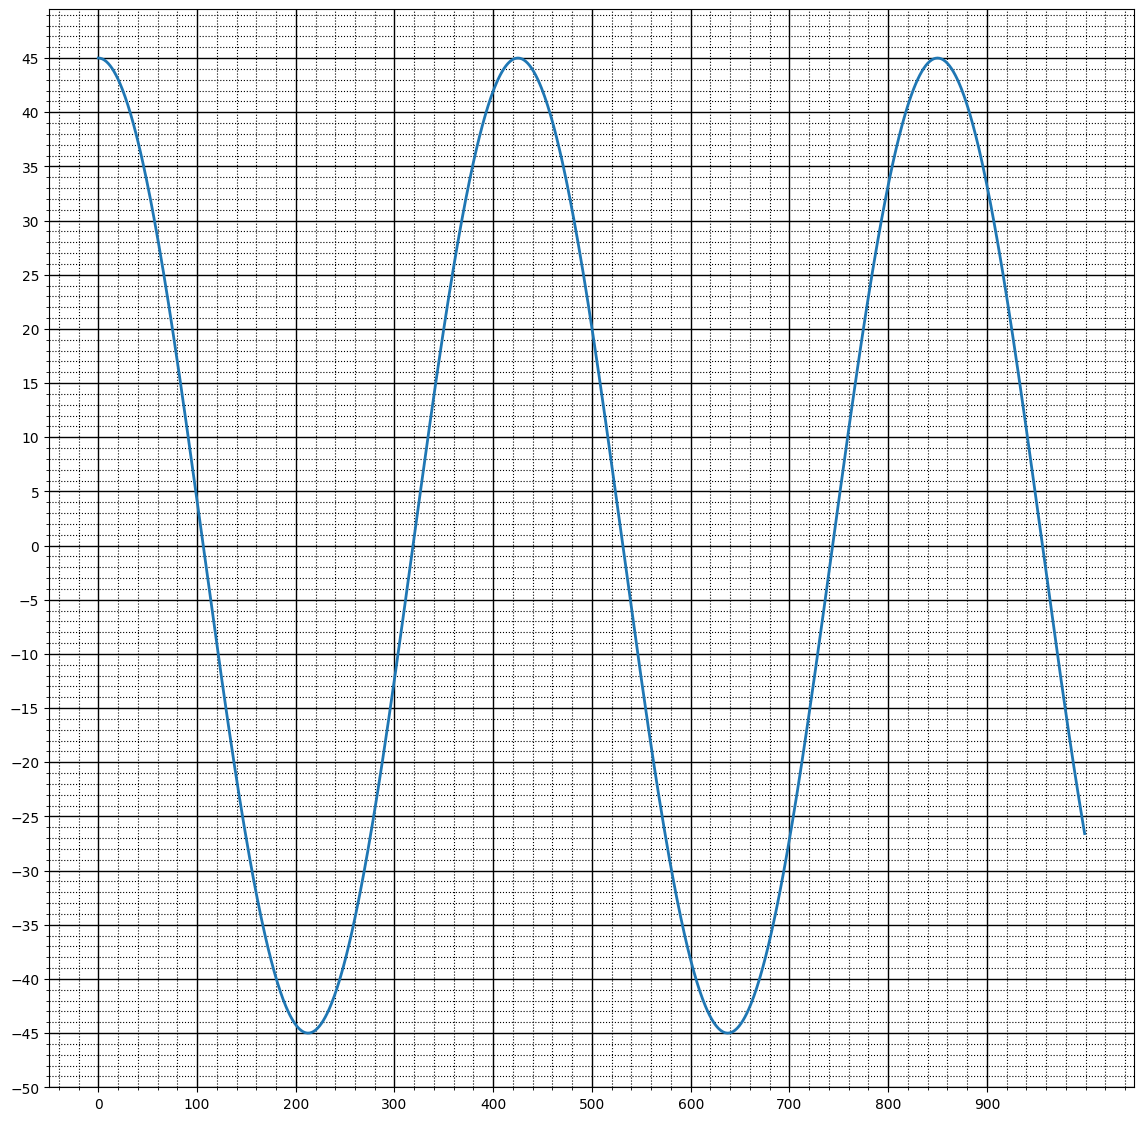

In [127]:
draw_signal(test_data['task2']['a'])

In [130]:
# YOUR CODE HERE
t = np.arange(0, 1000)
a = 45*np.cos(2*np.pi/425*t)

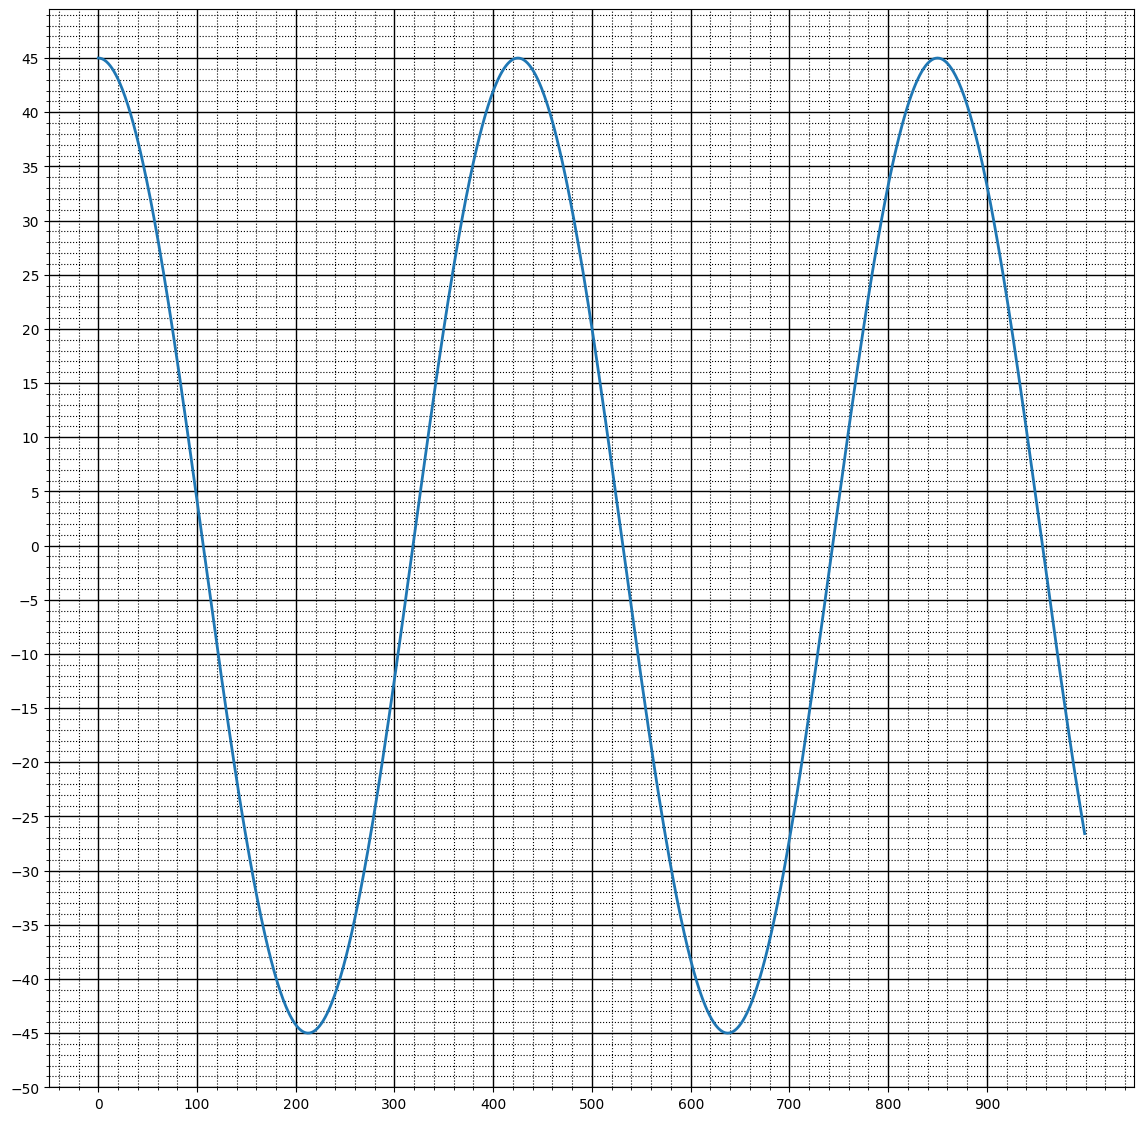

In [131]:
draw_signal(a)

In [132]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= 45$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = \frac{2\pi}{425}$

3. Фаза - $\phi= 0$

### Сигнал ***b***

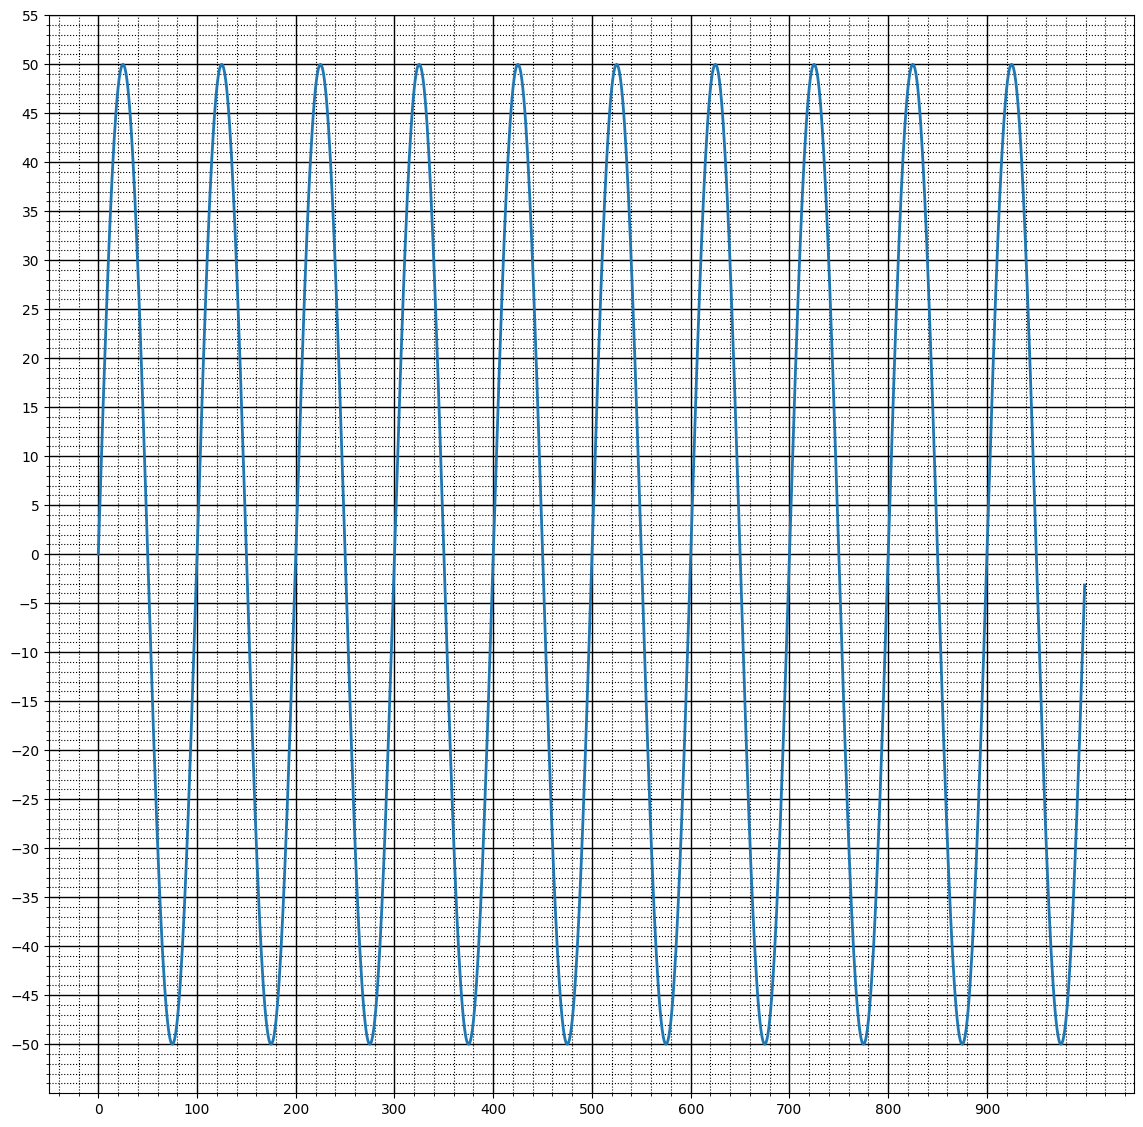

In [133]:
draw_signal(test_data['task2']['b'])

In [189]:
# YOUR CODE HERE
b = 50*np.cos(np.pi/50*t - np.pi/2)

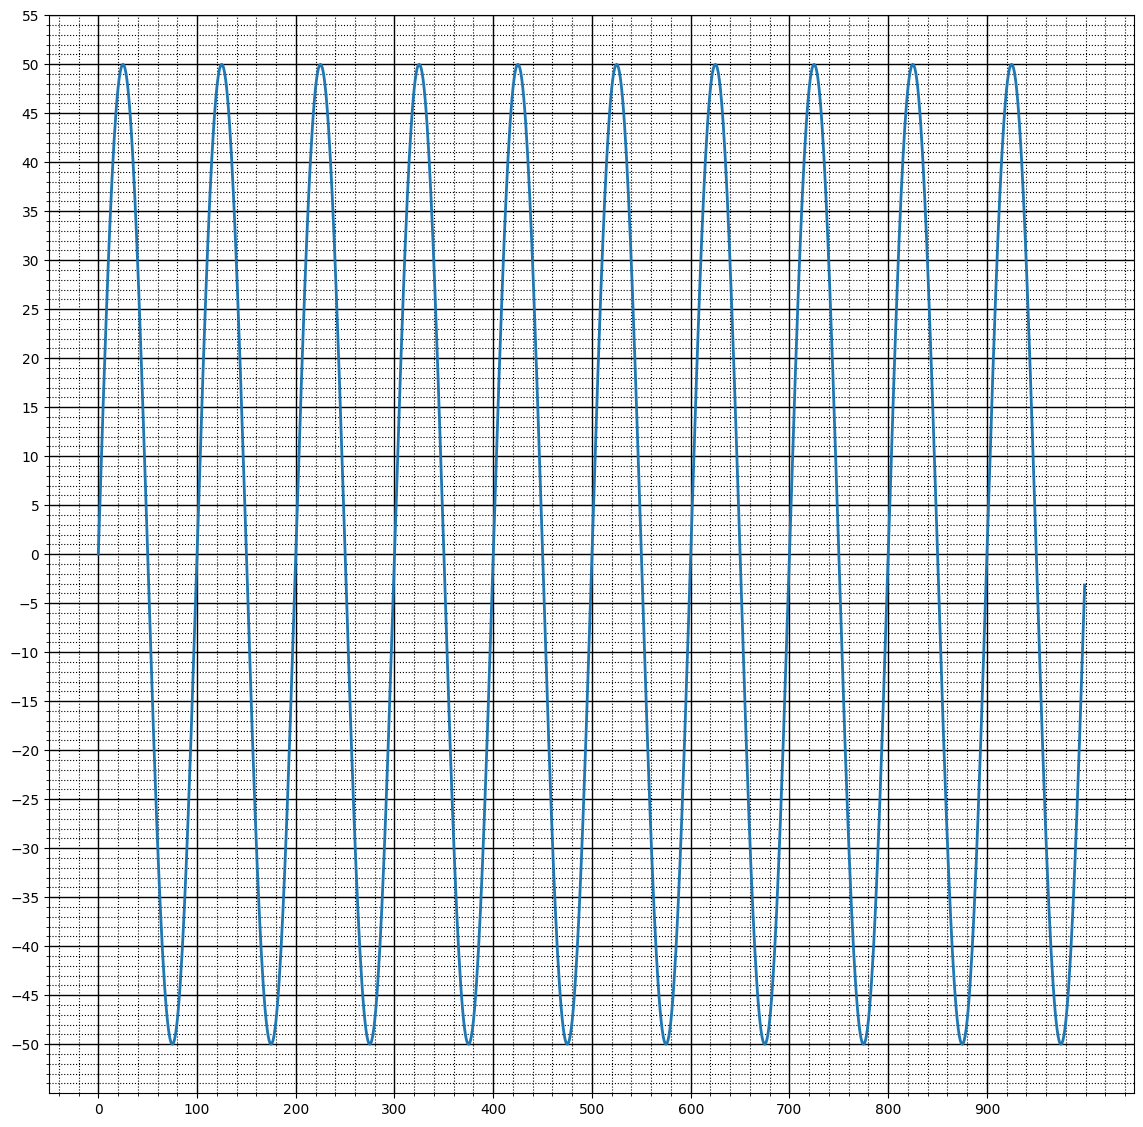

In [190]:
draw_signal(b)

In [191]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= 50$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = \frac{2\pi}{100} = \frac{\pi}{50}$

3. Фаза - $\phi= -\dfrac{\pi}{2}$

### Сигнал ***c***

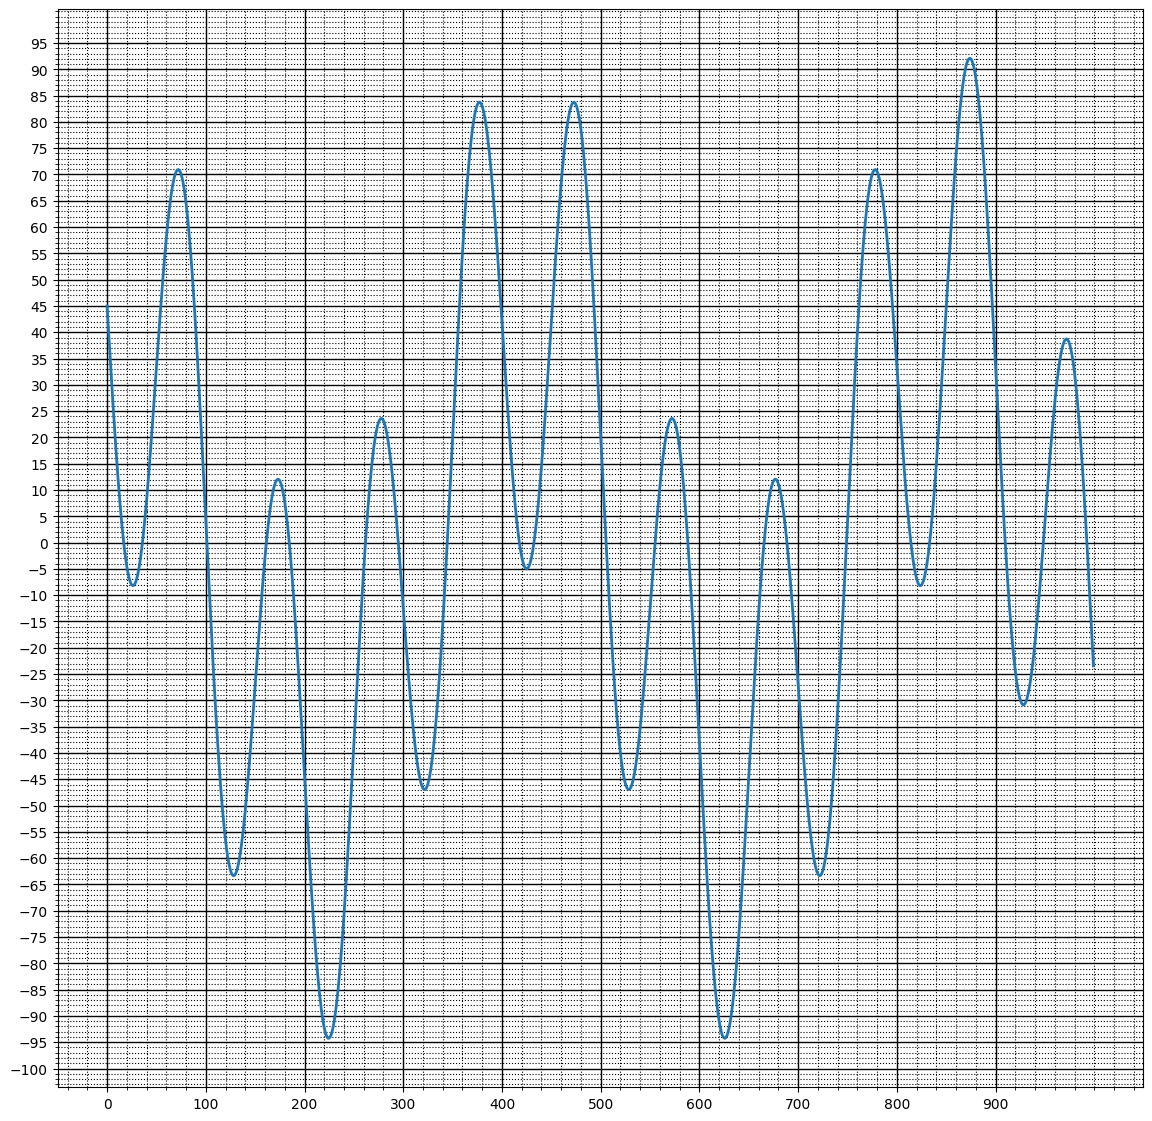

In [151]:
draw_signal(test_data['task2']['c'])

In [172]:
test_data['task2']['c'][101]

0.3496801041923776

In [186]:
# сигнал состоит из двух гармоник
# YOUR CODE HERE
c = -50*np.sin(np.pi/50*t) + 45*np.cos(2*np.pi/425*t)

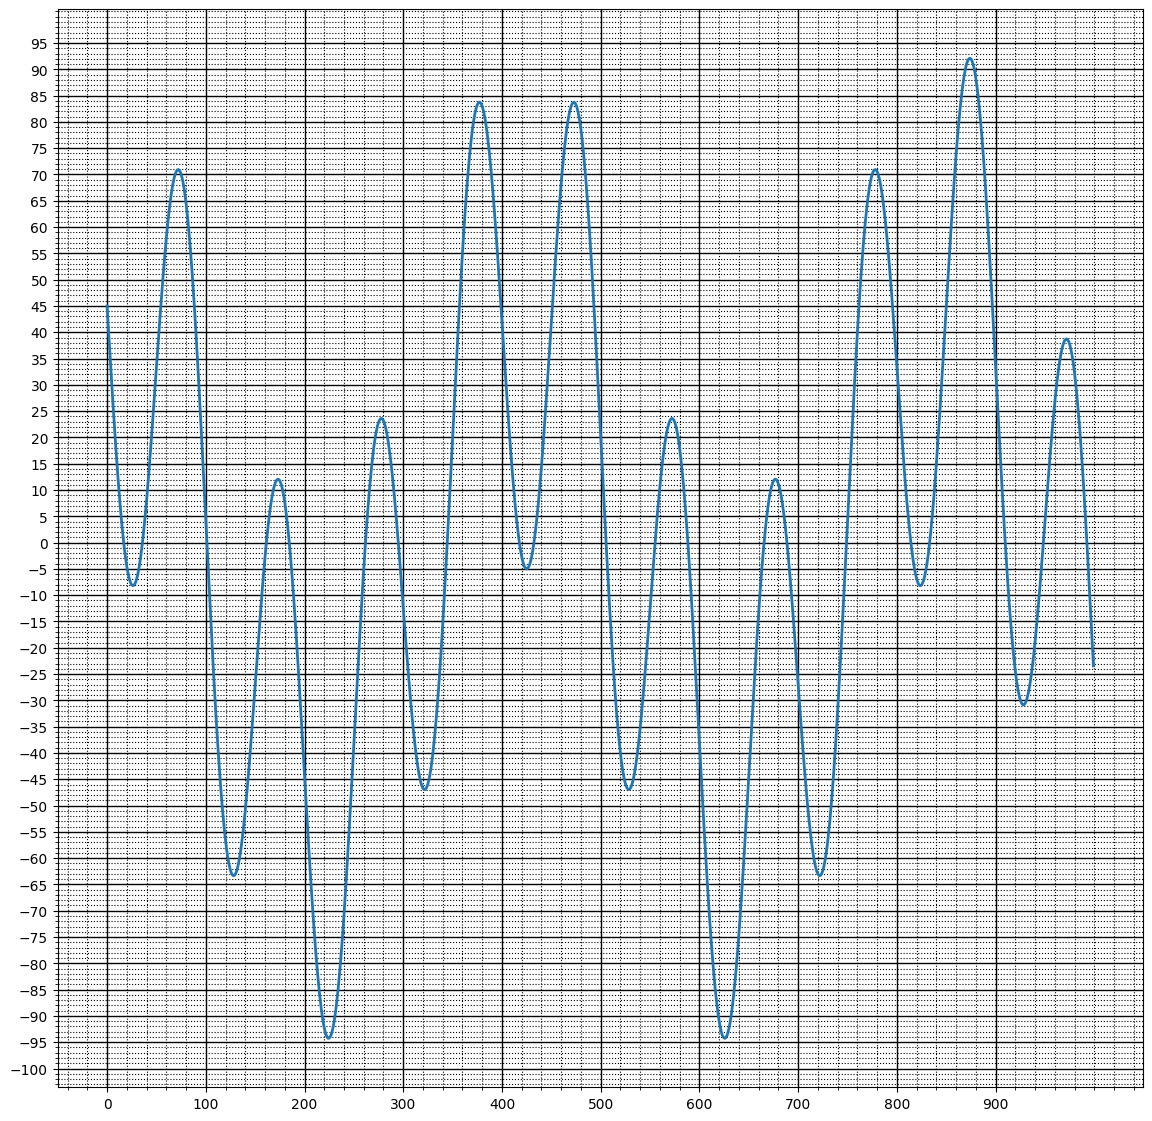

In [187]:
draw_signal(c)

In [188]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [203]:
import scipy

In [204]:
def convolve(in1, in2):
    n_1, n_2 = in1.shape[0], in2.shape[0]
    res = []
    i = 0
    if n_1 >= n_2:
        while i < n_1:
            cur_r = np.dot(in1[0:i+1], in2[n_2 - 1 - i:n_2]) if n_2-1-i >=0 else np.dot(in1[i - n_2 +1:i+1], in2[0:n_2])
            i += 1
            res.append(cur_r)
        i = n_2 - 1
        while i > 0:
            cur_r = np.dot(in1[n_1 - i:n_1], in2[0:i])
            i -= 1
            res.append(cur_r)
    else:
        while i < n_2:
            cur_r = np.dot(in2[0:i+1], in1[n_1 - 1 - i:n_1]) if n_1-1-i >=0 else np.dot(in2[i - n_1 +1:i+1], in1[0:n_1])
            i += 1
            res.append(cur_r)
        i = n_1 - 1
        while i > 0:
            cur_r = np.dot(in2[n_2 - i:n_2], in1[0:i])
            i -= 1
            res.append(cur_r)
    return np.array(res)

In [205]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [206]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [207]:
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

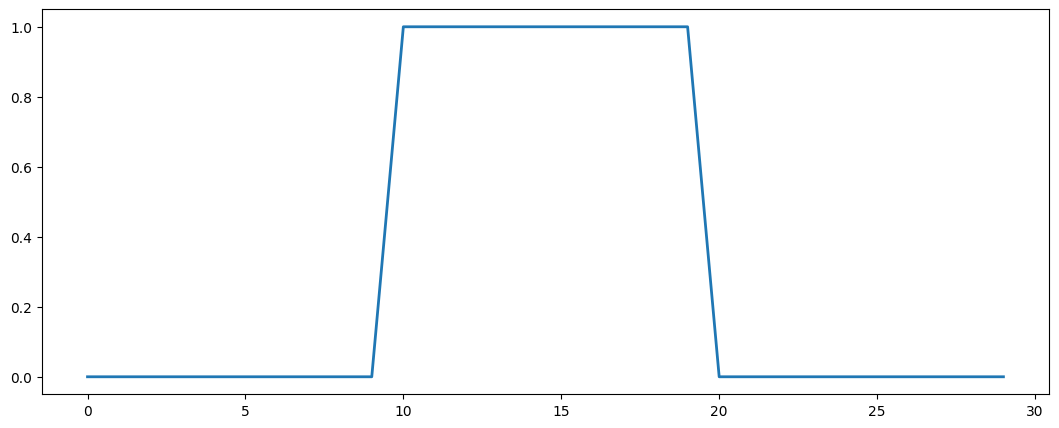

In [228]:
plt.figure(figsize=(13, 5))
plt.plot(a, linewidth=2)
plt.show()

Сигнал **b**

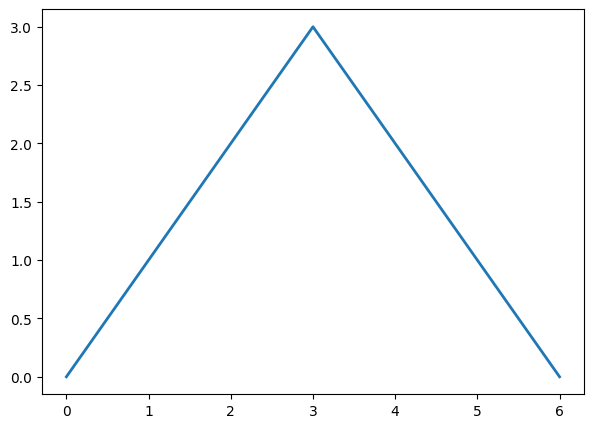

In [219]:
plt.figure(figsize=(7, 5))
plt.plot(b, linewidth=2)
plt.show()

Свертка **a** и **b**

In [220]:
conv = convolve(a, b)

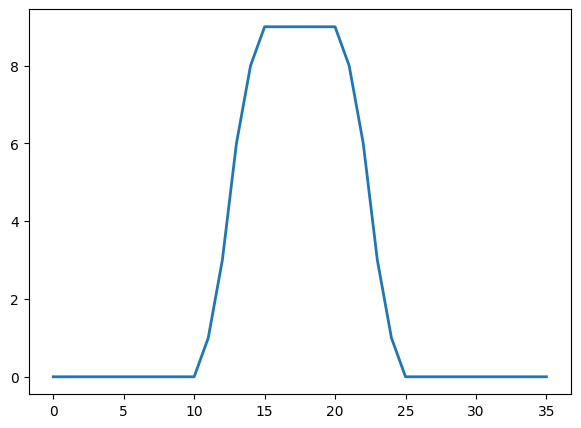

In [221]:
plt.figure(figsize=(7, 5))
plt.plot(conv, linewidth=2)
plt.show()

Все 3 графика на одной картинке:

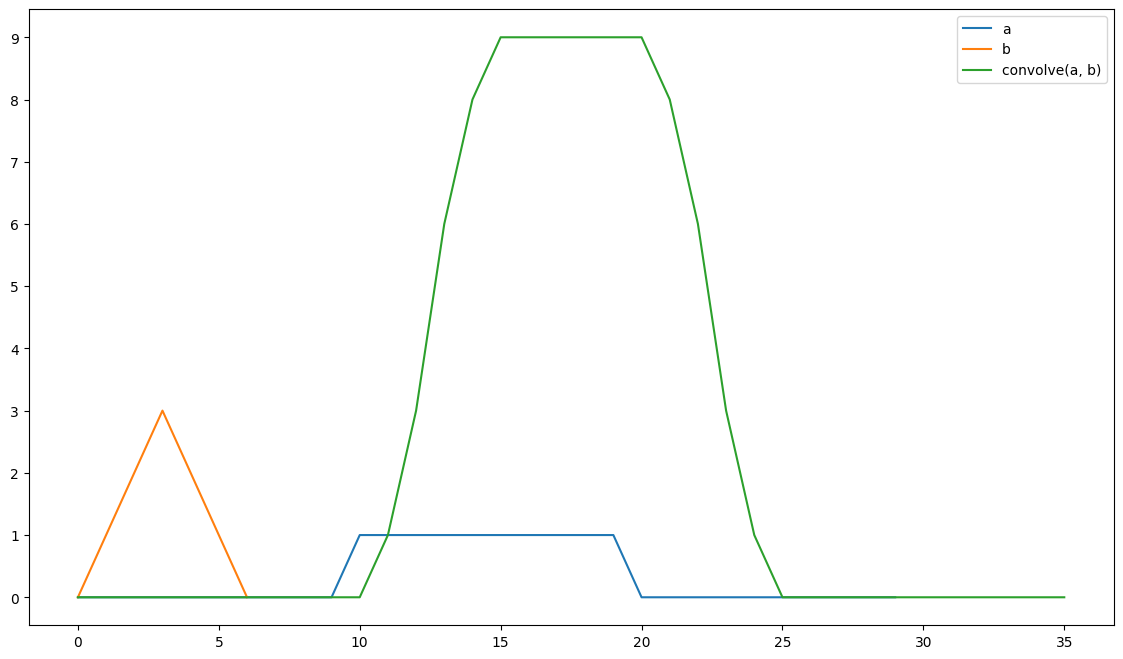

In [227]:
plt.figure(figsize = (14, 8))
plt.plot(a)
plt.plot(b)
plt.plot(conv)
plt.yticks(np.arange(0, 10))
plt.legend(['a', 'b', 'convolve(a, b)'])
plt.show()

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [ ]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise 
    # YOUR CODE HERE

   

    raise NotImplementedError()

In [ ]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [ ]:
# YOUR CODE HERE

Визуализируем затухание амплитуды:

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

In [ ]:
# YOUR CODE HERE